In [1]:
import numpy as np, basic, prjlib, plottools as pl
from matplotlib.pyplot import *

In [10]:
Tcmb = 2.72e6
ntype = 'base_roll50'
#ntype = 'goal_roll50'

In [11]:
p = {}
TT, EE, BB, TN, EN, BN = {}, {}, {}, {}, {}, {}
for t, lmax in [('sa',2048),('la',4096)]:
#for t, lmax in [('la',4096)]:
    for nu in ['93','145','225','com']:
        p[t+nu] = prjlib.analysis_init(t=t,freq=nu,ntype=ntype)
        print('loading from',p[t+nu].fcmb.scl['o'])
        l, TT[t+nu], EE[t+nu], BB[t+nu] = np.loadtxt(p[t+nu].fcmb.scl['s'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
        l, TN[t+nu], EN[t+nu], BN[t+nu] = np.loadtxt(p[t+nu].fcmb.scl['n'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
pid = prjlib.analysis_init(t='id',ntype='cv')
l, TT['id'], EE['id'], BB['id'] = np.loadtxt(pid.fcmb.scl['o'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
L = np.linspace(0,2048,2049)
s = l*(l+1.)*Tcmb**2/2./np.pi
lTT = p['lacom'].lTT

loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sa93_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sa145_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sa225_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sacom_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la93_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la145_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la225_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/lacom_base_roll50_mv3_a5.0deg_none_o.dat


In [12]:
# analytic noise
NT, NE, NB = prjlib.nlofficial(ntype[:4] if ntype=='goal' else 'baseline',deproj=-1,cols=(3,4,5,6))

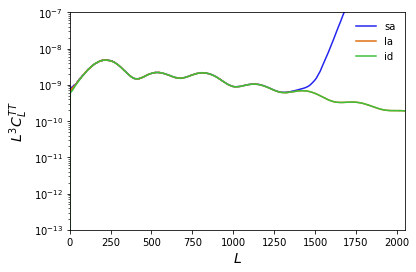

In [13]:
# TT
pl.plot_1dstyle(xmin=2,xmax=2048,ylab='$L^3C_L^{TT}$',ylog=True,ymin=1e-13,ymax=1e-7)
plot(L,L**2*TT['sa145'],label='sa')
plot(l,l**2*TT['la145'],label='la')
plot(l,l**2*lTT,label='id')
legend()

Temperature

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divid

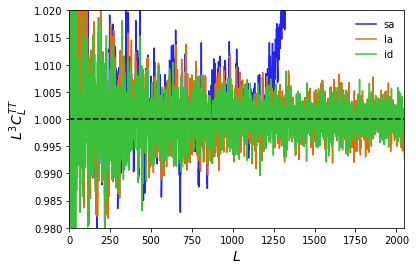

In [14]:
# TT
pl.plot_1dstyle(xmin=2,xmax=2048,ylab='$L^3C_L^{TT}$',ymin=.98,ymax=1.02)
plot(L,TT['sa225']/lTT[:p['sa225'].lmax+1],label='sa')
plot(l,TT['la145']/lTT[:lmax+1],label='la')
plot(l,TT['id']/lTT[:lmax+1],label='id')
axhline(1,color='k',ls='--')
legend()

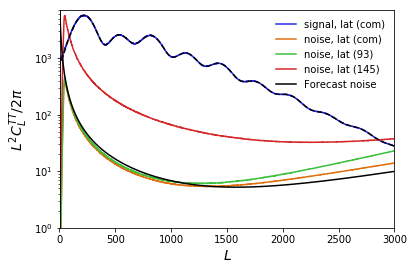

In [15]:
pl.plot_1dstyle(xmin=2,xmax=3000,ylab='$L^2C_L^{TT}/2\pi$',ylog=True,ymin=1.,ymax=7e3)
plot(l,s*TT['lacom'],label='signal, lat (com)')
plot(l,s*TN['lacom'],label='noise, lat (com)')
plot(l,s*TN['la93'],label='noise, lat (93)')
plot(l,s*TN['la145'],label='noise, lat (145)')
plot(l,s*lTT[:lmax+1],'k--')
plot(l,s*NT[:lmax+1]/Tcmb**2,'k-',label='Forecast noise')
legend(loc=0)

Polarization

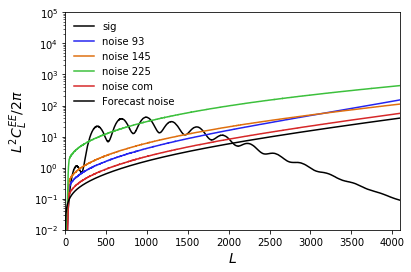

In [16]:
# EE + noise
pl.plot_1dstyle(xmin=2,xmax=4096,ylab='$L^2C_L^{EE}/2\pi$',ylog=True,ymin=1e-2,ymax=1e5)
for nu in ['93','145','225','com']:
    if nu=='93':  plot(l,s*EE['la'+nu],'k-',label='sig')
    plot(l,s*EN['la'+nu],label='noise '+nu)
plot(l,s*NB[:lmax+1]/Tcmb**2,'k-',label='Forecast noise')
legend()

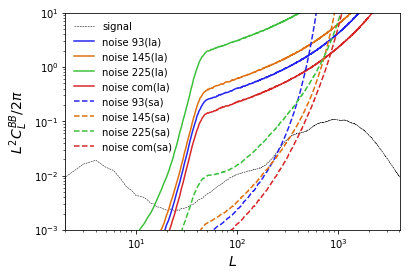

In [17]:
# BB + noise
co = rcParams['axes.prop_cycle'].by_key()['color']
pl.plot_1dstyle(xmin=2,xmax=4096,ylab='$L^2C_L^{BB}/2\pi$',xlog=True,ylog=True,ymin=1e-3,ymax=1e1)
plot(l,s*BB['la93'],'k--',lw=0.5,label='signal')
for t, l0, ls in [('la',l,'-'),('sa',L,'--')]:
    for i, nu in enumerate(['93','145','225','com']):
        plot(l0,l0*(l0+1.)*BN[t+nu]/2./np.pi*Tcmb**2,color=co[i],ls=ls,label='noise '+nu+'('+t+')')
legend()